<center><font size="10"> 🔥Unsupervised Learning🔥 </font></center>

# Clustering Algorithms

## ✨ K-means ✨

#### Lets load blobs dataset and create 5 centroids

In [9]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [10]:
blob_centers = np.array([[ 0.2,  2.3],[-1.5 ,  2.3],[-2.8,  1.8],[-2.8,  2.8],[-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [11]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

#### Plotting this data to see the clusters

In [12]:
def plot_clusters(X, y = None):
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

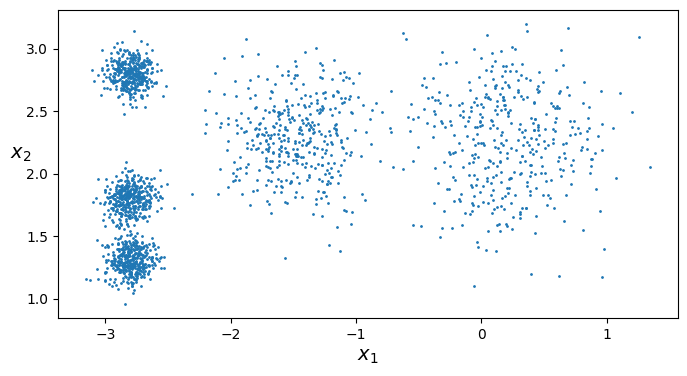

In [13]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

#### lets perform Kmeans on these clusters

In [14]:
from sklearn.cluster import KMeans

In [15]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit(X)

In [16]:
y_pred

KMeans(n_clusters=5, n_init=10, random_state=42)

In [17]:
y_pred is kmeans.labels_

False

In [18]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [19]:
X_new = np.array([[0, 2], [3,2], [-3,3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [20]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [21]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

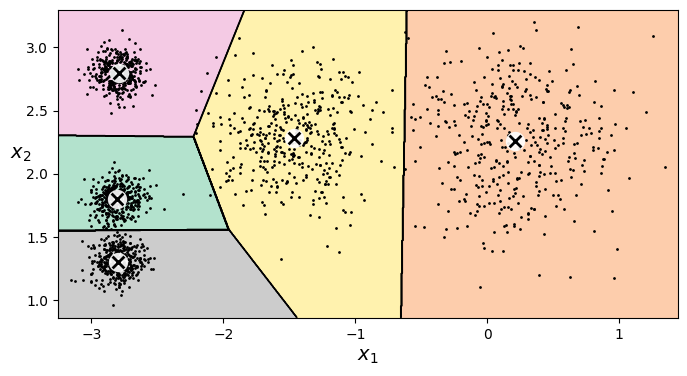

In [22]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

#### Kmeans decision boundaries also called as Voronoi Tessellation👆👆

In [23]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

#### how to choose the value of k

In [24]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
                for k in range(1, 10)]

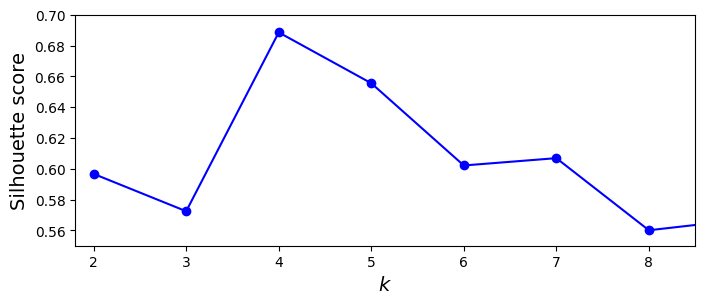

In [25]:
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

plt.show()

#### Silhoutte daigram 👆👆
#### This is used to detect the optimum amount in value of k 

#### Performing Segmentation using clustering

In [26]:
from matplotlib.image import imread
Image = imread('ladybug.png')
Image.shape

(533, 800, 3)

In [27]:
X = Image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(Image.shape)

#### Choosing number of clusters as number of colours in decreasing order

In [28]:
segmented_imgs = []
n_colors = (10,8,6,4,2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(Image.shape))

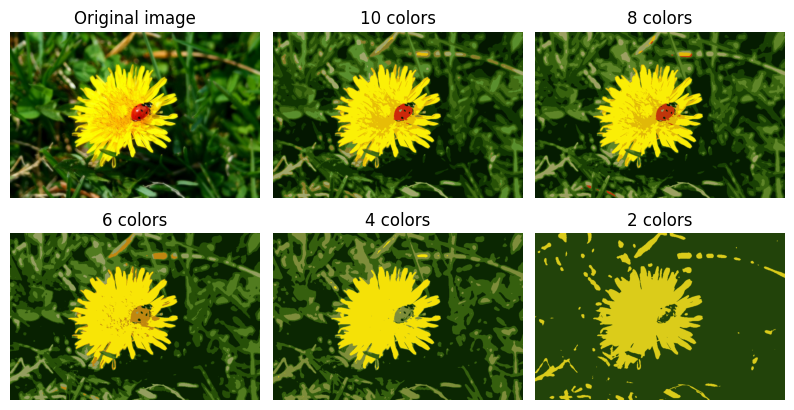

In [29]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(Image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

#### Even after being a flashy red on the ladybug, it being a very small cluster as compared to the rest of the colors. Hence gets faded.

#### Lets see how we can use KMeans to pipeline a regression model and find the best parameters using Grid Search

In [30]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
X_digits, y_digits

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [31]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

#### First lets try using a basic logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
log_reg.score(X_test, y_test)

0.9644444444444444

#### Pipelining Kmeans and logistic reg

In [34]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
            ("kmeans", KMeans(n_clusters=50, n_init=10)),
            ("log_reg", LogisticRegression()),
])

pipeline.fit(X_train, y_train)

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init=10)),
                ('log_reg', LogisticRegression())])

In [35]:
pipeline.score(X_test, y_test)

0.9577777777777777

#### So using Kmeans gave a slightly better accuracy
#### Grid Search for finding better Parametres which will be 99 values 2-100

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

In [37]:
grid_clf.best_params_

{'kmeans__n_clusters': 79}

In [38]:
grid_clf.score(X_test, y_test)

0.9644444444444444

In [39]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
log_reg.score(X_test, y_test)

0.8466666666666667

In [41]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


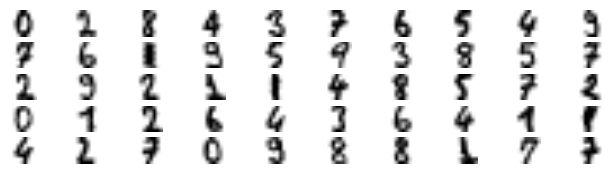

In [42]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [43]:
y_train[representative_digit_idx]

array([0, 2, 8, 4, 3, 7, 6, 5, 4, 9, 7, 6, 1, 9, 5, 9, 3, 8, 5, 7, 2, 9,
       2, 1, 1, 4, 8, 5, 7, 2, 0, 1, 2, 6, 4, 3, 6, 4, 1, 1, 4, 2, 7, 0,
       9, 8, 8, 1, 7, 7])

#### Labeling the above set of digits

In [44]:
y_representative_digits = np.array([0, 8, 6, 7, 1, 3, 3, 2, 5, 4, 3, 1, 2, 5, 7, 5, 0, 4, 4, 5, 7, 3,
        7, 3, 1, 9, 7, 6, 1, 8, 1, 1, 5, 8, 0, 7, 3, 4, 2, 9, 7, 2, 5, 2,
        1, 2, 2, 4, 9, 9])

#### Lets preform Logistic Regression on the classified data from KMeans clusters

In [45]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.11555555555555555

In [46]:
y_train_propogated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propogated[kmeans.labels_ == i] = y_representative_digits[i]

In [47]:
log_reg.fit(X_train, y_train_propogated)
log_reg.score(X_test, y_test)

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.10222222222222223

In [48]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [49]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propogated[partially_propagated]

In [50]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [51]:
log_reg.score(X_test, y_test)

0.09777777777777778

In [52]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.11488511488511488

## ✨ DBScan ✨

In [53]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y =  make_moons(n_samples=1000, noise = 0.05)
dbscan = DBSCAN(eps = 0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [54]:
dbscan.labels_

array([ 0,  1,  2,  1,  3,  1,  3,  4,  1,  1,  2,  0,  3,  4,  5,  0,  1,
       -1, -1,  3,  3,  2,  2,  0,  2,  2,  2,  1,  2,  3,  2,  3,  2,  0,
        1,  3,  2,  2,  5,  2,  1,  1,  3,  3,  0,  1,  1,  1,  2,  0,  3,
        2,  4,  0,  2,  0,  3,  1,  1,  2,  5,  1,  2,  2, -1,  2, -1,  3,
        2,  0, -1,  1, -1,  5,  4,  1,  3,  3,  3,  2,  0,  0,  3,  5, -1,
        3,  1,  3,  3, -1,  3,  1,  0,  1,  0,  5,  5,  1,  4,  3,  5,  1,
        3,  1,  3,  5,  2,  4,  2,  2,  1,  1,  2,  5,  3, -1, -1,  1,  0,
        1,  1,  2,  4,  1,  0,  1,  1,  0,  0,  1,  3,  2,  2,  4,  0,  2,
        1,  4, -1,  0,  1,  1,  1,  3, -1,  1,  0,  2,  1,  1,  1,  4,  3,
        1,  2,  0,  3,  4, -1,  4,  1,  4,  3,  1,  2,  3,  2, -1,  1,  0,
        5,  2,  0,  3,  4,  4,  1,  1,  1,  3, -1,  3,  2,  1,  0,  2,  4,
        1,  5,  1,  1,  1,  5,  3,  2, -1,  4,  2,  0,  1,  0, -1,  7,  3,
        3,  6,  2,  1,  1,  2,  3,  1,  1,  4,  3,  2,  2,  3,  1,  0,  1,
        2,  0,  1,  0,  0

#### cluster index equal to -1: this means that they are considered as anomalies by the algorithm.

In [55]:
len(dbscan.core_sample_indices_)

800

In [56]:
dbscan.components_

array([[ 0.96315645,  0.14056337],
       [-0.29804171,  0.8821777 ],
       [ 0.6147123 , -0.37835159],
       ...,
       [ 0.6184226 , -0.509125  ],
       [ 0.860386  , -0.47371205],
       [-0.56411152,  0.87147614]])

In [57]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

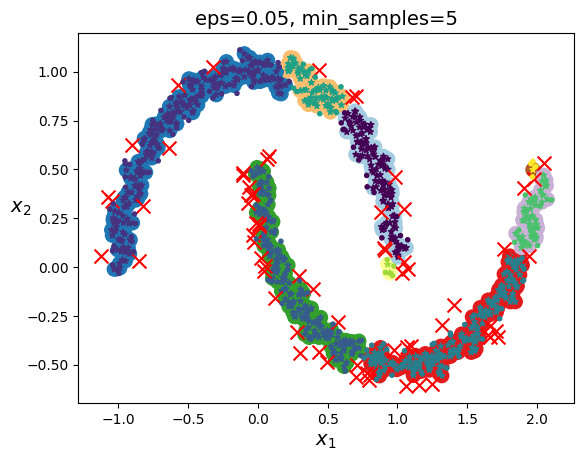

In [58]:
plot_dbscan(dbscan, X, size=100)

#### The crosses are anomalies

#### Lets check the graph with higher ε

In [59]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

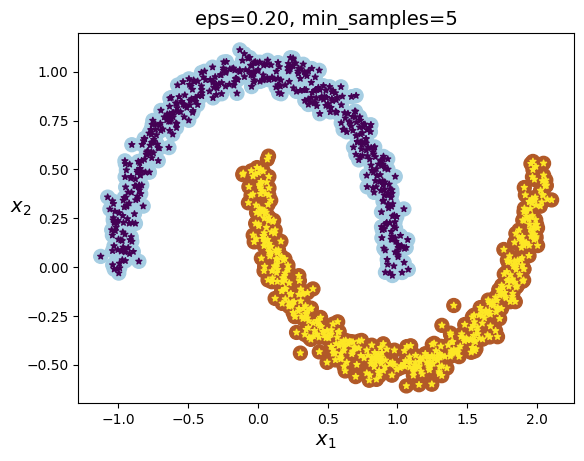

In [60]:
plot_dbscan(dbscan2, X, size=100)

#### To predict while using DBSCAN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [68]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [70]:
knn.predict(X_new)

array([1, 2, 0, 5], dtype=int64)

In [71]:
knn.predict_proba(X_new)

array([[0.  , 0.9 , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.06, 0.94, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.6 , 0.  , 0.02, 0.34, 0.  , 0.  , 0.04, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.02]])

In [72]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2] = -1
y_pred.ravel()

array([-1,  2,  6, -1], dtype=int64)

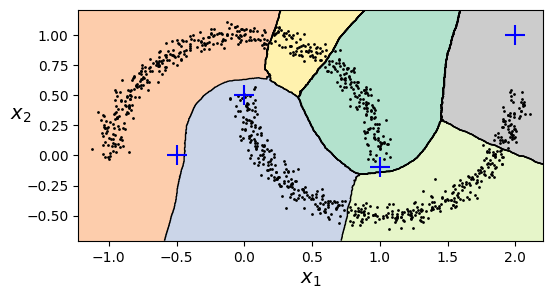

In [73]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

## ✨ Gaussian Mixture ✨

In [74]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [76]:
gm.weights_

array([0.20674137, 0.5814206 , 0.21183804])

In [77]:
gm.means_

array([[-0.73626396,  0.55990104],
       [ 0.49623384,  0.25699346],
       [ 1.72120067, -0.07723736]])

In [78]:
gm.covariances_

array([[[ 0.05325897,  0.06165855],
        [ 0.06165855,  0.08708295]],

       [[ 0.15964208, -0.09517762],
        [-0.09517762,  0.28730328]],

       [[ 0.06204072,  0.06949051],
        [ 0.06949051,  0.09198532]]])

In [79]:
gm.converged_

True

In [80]:
gm.n_iter_

16

In [81]:
gm.predict(X)

array([1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0,
       1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,

In [82]:
gm.predict_proba(X)

array([[1.34308183e-090, 1.00000000e+000, 1.64518500e-019],
       [4.97634626e-001, 5.02365374e-001, 2.89731213e-173],
       [4.45247685e-094, 1.00000000e+000, 7.91316435e-018],
       ...,
       [3.33351513e-125, 9.99999817e-001, 1.82926836e-007],
       [8.16902182e-086, 1.00000000e+000, 5.71302553e-022],
       [9.75890185e-001, 2.41098153e-002, 1.29795446e-207]])

In [83]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.80130047,  0.48904314],
       [-0.72149453,  0.79060909],
       [-0.83024554,  0.53656556],
       [ 1.37593189, -0.50621289],
       [ 0.87277202,  0.19469351],
       [ 1.41453187, -0.46446927]])

In [84]:
y_new

array([0, 0, 0, 1, 1, 2])

In [85]:
gm.score_samples(X)

array([-1.46882901e+00, -2.06646441e+00, -1.46465939e+00, -8.41682512e-02,
       -2.10086747e+00, -2.09309809e-01, -6.83024611e-01, -1.67017419e+00,
       -6.85068456e-01, -2.26178635e+00, -2.00811584e+00, -1.76493235e+00,
       -1.96742913e+00, -1.40851201e+00, -1.40121763e+00, -1.78670550e+00,
       -1.38117340e+00, -1.70074366e+00, -1.27354225e+00, -2.43060126e-01,
       -2.19450674e+00, -1.44835896e+00, -1.63062102e+00, -1.34812691e+00,
       -1.55984845e+00, -1.44701968e+00, -1.76781209e+00, -6.01718697e-01,
       -1.82694488e+00,  4.81734676e-02, -1.45426242e+00, -1.09993732e-01,
       -1.49496282e+00, -1.80881949e+00,  2.45916434e-02, -5.80636379e-02,
       -1.56840927e+00, -1.31703484e+00, -3.47014974e-01, -1.34712843e+00,
       -2.23310779e+00, -2.24683986e+00, -2.10558176e+00, -1.44012006e+00,
       -1.39614361e+00, -3.29366451e-01, -7.96713628e-01, -1.76857521e+00,
       -1.34933071e+00, -1.78516117e+00, -1.62967546e+00, -1.45045240e+00,
       -1.46481711e+00, -

In [87]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                    np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

C:\Users\unnikris\AppData\Local\Temp\ipykernel_13272\1650297834.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
C:\Users\unnikris\AppData\Local\Temp\ipykernel_13272\1650297834.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,


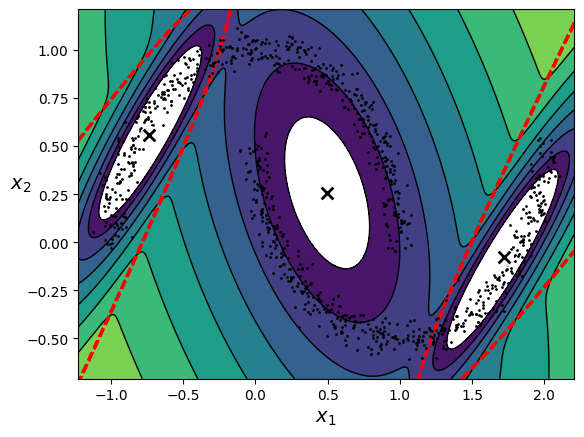

In [88]:
plot_gaussian_mixture(gm,X)
plt.show()

#### this plot shows the cluster means, the decision boundaries (dashed lines), and the density contours of this model

#### Anomaly Detection Using Gaussian Mixture

In [90]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities<density_threshold]

C:\Users\unnikris\AppData\Local\Temp\ipykernel_13272\1650297834.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
C:\Users\unnikris\AppData\Local\Temp\ipykernel_13272\1650297834.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,


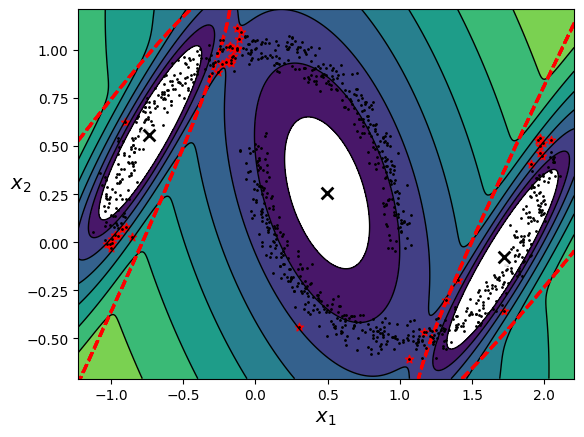

In [93]:
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')

plt.show()

#### anomalies are represented as stars

#### Bayesian information criterion (BIC) and Akaike information criterion (AIC)

In [94]:
gm.bic(X)

2721.6094462180395

In [95]:
gm.aic(X)

2638.177606475343

In [96]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
            for k in range(1, 11)]

In [97]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

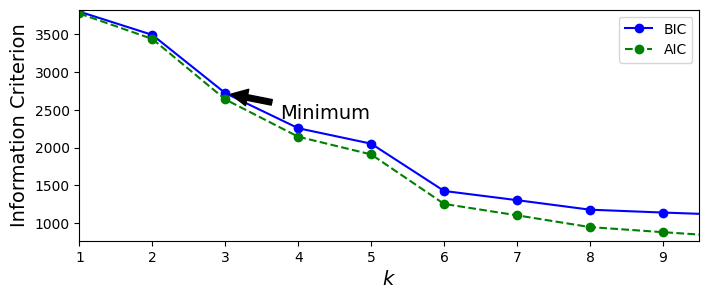

In [98]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
            xy=(3, bics[2]),
            xytext=(0.35, 0.6),
            textcoords='figure fraction',
            fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [99]:
from sklearn.mixture import BayesianGaussianMixture

In [100]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10)

In [101]:
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10)

In [102]:
np.round(bgm.weights_,2)

array([0.13, 0.13, 0.09, 0.13, 0.17, 0.12, 0.11, 0.1 , 0.  , 0.  ])